<img src="channels4_profile.jpg" width="400" height='400' align='centre'/>



## Background:

As part of the analytics team at ESPN, we continuously strive to enhance our understanding of sports dynamics and player performances to provide our audience with in-depth analyses and insights. Cricket, being one of the world's most popular sports, has a rich dataset of player performances that can be leveraged to uncover trends, potentials, and areas of improvement.

## Objective:

The primary objective of this analysis is to perform an elementary Exploratory Data Analysis (EDA) on the provided dataset of cricket players. The dataset encompasses various performance metrics and personal attributes of the players. Through this EDA, we aim to uncover patterns, correlations, and insights that could contribute to more nuanced reporting, commentary, and overall understanding of the game.
* Mandatory Insights:
    - players with top 10 career legnths
    - Avg batting_strike_rate who played over 10 years
    - Number of cricketer with score > 10,000 as greatest players
    - Max Higest innings score by country
    - Top 5 cricketing nations based on Hundreds, fifties, ducks (0)

# Goal:
Perform EDA and provide insights with viz

## Approach:
* Imports
* Removing redundancies:
    - remove '+' sign from columns 
    - remove duplicates
    - remove/replace nulls based on multivariate and univariate analysis
    - check for data-type 
    - Feature Engineering: Create new column "Out/Not Out" based on Highest Score innings

* Removing Nulls:<br>
    - Column highly correlateed to each other, we therefore use **Linear Regression or KNeighbors Regressor** as they leverage on strong correlation of columns for KNN and the regression aspect of KNeigh_Reg for continuos values respectively. 

    - You can use *machine learning models* to predict missing values based on the other features in your dataset.
    
    - This can be a more sophisticated approach and might require splitting your data into two sets: one with non-null values for training and one with null values for prediction.
    


In [1]:
# Import libraries
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# Read the file
df = pd.read_excel('/Users/dawny/Desktop/trial.xlsx')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  65 non-null     object 
 1   Span    65 non-null     object 
 2   Mat     65 non-null     object 
 3   Inns    65 non-null     int64  
 4   NO      65 non-null     int64  
 5   Runs    65 non-null     int64  
 6   HS      65 non-null     object 
 7   Ave     65 non-null     float64
 8   BF      62 non-null     object 
 9   SR      62 non-null     float64
 10  100     65 non-null     int64  
 11  50      65 non-null     int64  
 12  0       65 non-null     int64  
 13  4s      65 non-null     object 
 14  6s      65 non-null     object 
dtypes: float64(2), int64(6), object(7)
memory usage: 7.7+ KB


In [4]:
df.describe()

,Inns,NO,Runs,Ave,SR,100,50,0
count,65.000000,65.000000,65.000000,65.000000,62.000000,65.000000,65.000000,65.000000
mean,137.138462,14.138462,6488.015385,53.556154,49.965323,19.646154,28.569231,7.984615
std,84.839716,10.942859,3940.275425,7.108072,11.341566,12.171214,18.195097,5.495715
min,20.000000,1.000000,990.000000,48.000000,25.590000,1.000000,3.000000,1.000000
25%,62.000000,6.000000,2748.000000,49.370000,43.447500,8.000000,13.000000,3.000000
50%,137.000000,12.000000,6806.000000,51.620000,51.450000,21.000000,29.000000,7.000000
75%,193.000000,19.000000,8848.000000,56.670000,55.560000,29.000000,41.000000,12.000000
max,329.000000,49.000000,15921.000000,99.940000,91.760000,51.000000,68.000000,22.000000


In [5]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1


In [9]:
# Rename multiple columns in a list
df = df.rename(columns= {'NO': 'Not_Outs',
                    'Ave': 'Average',
                    'Mat': 'Matches',
                    'HS': "Highest_Inn_Score", 
                    'BF': 'Balls_Faced', 
                    'SR': 'Strike_Rate',
                    100: '100s',
                    50: '50s',
                    0: 'Ducks'} )

df.head()

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_Inn_Score,Average,Balls_Faced,Strike_Rate,100s,50s,Ducks,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1


In [10]:
# Remove duplicates:
df = df.drop_duplicates()

In [11]:
# Splitting Span into Rookie year and Final year
df['Rookie_Year'] = df['Span'].str.split(pat='-').str[0]

df['Final_Year'] = df['Span'].str.split(pat='-').str[1]

# converting both colums to numeric:
df['Rookie_Year'] = pd.to_numeric(df['Rookie_Year'], errors='coerce')
df['Final_Year'] = pd.to_numeric(df['Final_Year'], errors='coerce')

df = df.drop(['Span'], axis = 1)

# Adding Career_Length:
df['Career_Length'] = df['Final_Year'] - df['Rookie_Year']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 64
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             62 non-null     object 
 1   Matches            62 non-null     object 
 2   Inns               62 non-null     int64  
 3   Not_Outs           62 non-null     int64  
 4   Runs               62 non-null     int64  
 5   Highest_Inn_Score  62 non-null     object 
 6   Average            62 non-null     float64
 7   Balls_Faced        59 non-null     object 
 8   Strike_Rate        59 non-null     float64
 9   100s               62 non-null     int64  
 10  50s                62 non-null     int64  
 11  Ducks              62 non-null     int64  
 12  4s                 62 non-null     object 
 13  6s                 62 non-null     object 
 14  Rookie_Year        62 non-null     int64  
 15  Final_Year         62 non-null     int64  
 16  Career_Length      62 non-nu

In [13]:
# Split the country from the player
print(df['Player'].str.split(pat = '(').head(5))

df['Country'] = df['Player'].str.split(pat= '(').str[1] # You grab the second string after the split
df['Country'] = df['Country'].str.split(pat = ')').str[0] # Grab the string from Country and split it

df['Player'] = df['Player'].str.split(pat= '(').str[0]
df.head()

0    [DG Bradman , AUS)]
1      [HC Brook , ENG)]
2      [AC Voges , AUS)]
3     [RG Pollock , SA)]
4     [GA Headley , WI)]
Name: Player, dtype: object


,Player,Matches,Inns,Not_Outs,Runs,Highest_Inn_Score,Average,Balls_Faced,Strike_Rate,100s,50s,Ducks,4s,6s,Rookie_Year,Final_Year,Career_Length,Country
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948,20,AUS
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,1,ENG
2,AC Voges,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016,1,AUS
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970,7,SA
4,GA Headley,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1,1930,1954,24,WI


In [14]:
# Remove ICC from country
df['Country'] = df['Country'].str.replace('ICC/', '', regex = False)

### Rectifying the  columns with special characters + and *:
* 6s
* 4s
* Balls Faced 
* Highest_inn_score
* Matches

In [15]:
# Symbol you want to search for
symbol = '*'  # Change this to the symbol you're searching for

# List to store the names of columns that contain the symbol
columns_with_symbol = []

# Iterate over each column in the DataFrame
for column in df.columns:
    # Use the .apply() method with a lambda function to check each cell for the symbol
    if df[column].apply(lambda x: symbol in str(x)).any():
        # If any cell in the column contains the symbol, add the column name to the list
        columns_with_symbol.append(column)

# Print or return the list of columns that contain the symbol
print(columns_with_symbol)

['Matches', 'Highest_Inn_Score']


In [16]:
import pandas as pd

# Assuming 'df' is your pandas DataFrame

# Symbol you want to search for
symbol = '+'  # Change this to the symbol you're searching for

# List to store the names of columns that contain the symbol
columns_with_symbol = []

# Iterate over each column in the DataFrame
for column in df.columns:
    # Use the .apply() method with a lambda function to check each cell for the symbol
    if df[column].apply(lambda x: symbol in str(x)).any():
        # If any cell in the column contains the symbol, add the column name to the list
        columns_with_symbol.append(column)

# Print or return the list of columns that contain the symbol
print(columns_with_symbol)

['Balls_Faced', '4s', '6s']


In [17]:
# Changing string pbject to integers: Balls_Faced


df['Balls_Faced'] = df['Balls_Faced'].astype(str)

df['Balls_Faced']  = df['Balls_Faced'].str.replace('+', '', regex = False)

df['Balls_Faced'] = pd.to_numeric(df['Balls_Faced'], errors='coerce')

In [18]:
# Changing string object to integers: Matches
df['Matches'] = df['Matches'].astype(str)

df['Matches'] = df['Matches'].str.replace('*','', regex=False)

df['Matches'] = pd.to_numeric(df['Matches'], errors='coerce')

In [19]:
# Changing string object to integers: 4s
df['4s'] = df['4s'].astype(str)

df['4s'] = df['4s'].str.replace('+', '', regex = False)

df['4s'] = pd.to_numeric(df['4s'], errors='coerce')

In [20]:
# Converting the colum to string to search for potential + sign
df['6s'] = df['6s'].astype(str)

In [21]:
# boolean mask to reutrn rows that have a fault:
mask = df['6s'].apply(lambda x: bool(re.search('\+', x)))
df[mask]

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inn_Score,Average,Balls_Faced,Strike_Rate,100s,50s,Ducks,4s,6s,Rookie_Year,Final_Year,Career_Length,Country
10,GS Sobers,93,160,21,8032,365*,57.78,4063.0,53.58,26,30,12,593,32+,1954,1974,20,WI
63,SJ McCabe,39,62,5,2748,232,48.21,3217.0,60.02,6,13,4,241,5+,1930,1938,8,AUS


In [22]:
# Replace the + values with empty strings
df['6s'] = df['6s'].str.replace('\+', '', regex=False)

df['6s'] = pd.to_numeric(df['6s'], errors='coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 64
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             62 non-null     object 
 1   Matches            62 non-null     int64  
 2   Inns               62 non-null     int64  
 3   Not_Outs           62 non-null     int64  
 4   Runs               62 non-null     int64  
 5   Highest_Inn_Score  62 non-null     object 
 6   Average            62 non-null     float64
 7   Balls_Faced        59 non-null     float64
 8   Strike_Rate        59 non-null     float64
 9   100s               62 non-null     int64  
 10  50s                62 non-null     int64  
 11  Ducks              62 non-null     int64  
 12  4s                 62 non-null     int64  
 13  6s                 60 non-null     float64
 14  Rookie_Year        62 non-null     int64  
 15  Final_Year         62 non-null     int64  
 16  Career_Length      62 non-nu

In [24]:
df['Highest_Inn_Score'] = df['Highest_Inn_Score'].astype(str)

# Step 1: Create 'Out/Not_Out' column based on presence of '*'
df['Out/Not_Out'] = df['Highest_Inn_Score'].apply(lambda x: 'Not Out' if '*' in x else 'Out')

# Step 2: Remove '*' and convert the score to float
df['Highest_Inn_Score'] = df['Highest_Inn_Score'].str.replace('*', '', regex=False).astype(float)

In [25]:
df

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inn_Score,Average,Balls_Faced,Strike_Rate,100s,50s,Ducks,4s,6s,Rookie_Year,Final_Year,Career_Length,Country,Out/Not_Out
0,DG Bradman,52,80,10,6996,334.0,99.94,9800.0,58.60,29,13,7,626,6.0,1928,1948,20,AUS,Out
1,HC Brook,12,20,1,1181,186.0,62.15,1287.0,91.76,4,7,1,141,23.0,2022,2023,1,ENG,Out
2,AC Voges,20,31,7,1485,269.0,61.87,2667.0,55.68,5,4,2,186,5.0,2015,2016,1,AUS,Not Out
3,RG Pollock,23,41,4,2256,274.0,60.97,1707.0,54.48,7,11,1,246,11.0,1963,1970,7,SA,Out
4,GA Headley,22,40,4,2190,270.0,60.83,416.0,56.00,10,5,2,104,1.0,1930,1954,24,WI,Not Out
5,H Sutcliffe,54,84,9,4555,194.0,60.73,6558.0,34.59,16,23,2,202,6.0,1924,1935,11,ENG,Out
6,E Paynter,20,31,5,1540,243.0,59.23,1288.0,45.88,4,7,3,125,4.0,1931,1939,8,ENG,Out
7,KF Barrington,82,131,15,6806,256.0,58.67,4957.0,42.42,20,35,5,591,27.0,1955,1968,13,ENG,Out
8,ED Weekes,48,81,5,4455,207.0,58.61,NaN,NaN,15,19,6,258,2.0,1948,1958,10,WI,Out
9,WR Hammond,85,140,16,7249,336.0,58.45,7491.0,38.07,22,24,4,419,27.0,1927,1947,20,ENG,Not Out


In [26]:
pd.DataFrame(df.isnull().sum(), columns = ['Missing'])

,Missing
Player,0
Matches,0
Inns,0
Not_Outs,0
Runs,0
Highest_Inn_Score,0
Average,0
Balls_Faced,3
Strike_Rate,3
100s,0


### The data is now free from redundancies

### Removing Null values:

Our values are hiighly correlateed to each other, we can therefore use **KNN or KNeighbors Regressor** as they leverage on strong correlation of columns for KNN and the regression aspect of KNeigh_Reg for continuos values respectively 

In [27]:
df.head()

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inn_Score,Average,Balls_Faced,Strike_Rate,100s,50s,Ducks,4s,6s,Rookie_Year,Final_Year,Career_Length,Country,Out/Not_Out
0,DG Bradman,52,80,10,6996,334.0,99.94,9800.0,58.60,29,13,7,626,6.0,1928,1948,20,AUS,Out
1,HC Brook,12,20,1,1181,186.0,62.15,1287.0,91.76,4,7,1,141,23.0,2022,2023,1,ENG,Out
2,AC Voges,20,31,7,1485,269.0,61.87,2667.0,55.68,5,4,2,186,5.0,2015,2016,1,AUS,Not Out
3,RG Pollock,23,41,4,2256,274.0,60.97,1707.0,54.48,7,11,1,246,11.0,1963,1970,7,SA,Out
4,GA Headley,22,40,4,2190,270.0,60.83,416.0,56.00,10,5,2,104,1.0,1930,1954,24,WI,Not Out


<AxesSubplot:>

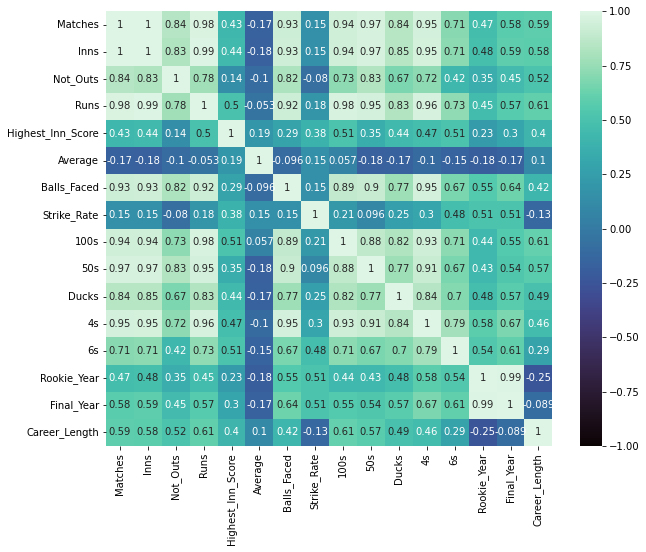

In [28]:
corr_matrix = df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, vmin = -1, vmax = 1, annot = True, cmap = 'mako' )



### Filling Null Values Using KNeighbors Regressor :

First you have remove the categorical features as it imputes values based on continuous values only that are nearest neighbors to the missing values

In [29]:
def predict_missing_values(df, target_column, feature_columns):
    # Split the data into two sets: one with null values and one without
    df_train = df.dropna(subset=[target_column])
    df_predict = df[df[target_column].isnull()]

    # Fit a model
    model = LinearRegression()
    model.fit(df_train[feature_columns], df_train[target_column])

    # Predict missing values
    predicted_values = model.predict(df_predict[feature_columns])
    df_predict[target_column] = predicted_values

    # Combine the datasets
    df_combined = pd.concat([df_train, df_predict], axis=0)

    return df_combined

In [30]:
# You need to choose relevant features for predicting 'Balls_Faced'
feature_columns = ['Matches', 'Inns', 'Runs']  # Example feature columns
df = predict_missing_values(df, 'Balls_Faced', feature_columns)

# Choose relevant features for predicting 'Strike_Rate'
feature_columns = ['Runs', 'Balls_Faced']  # Example feature columns
df = predict_missing_values(df, 'Strike_Rate', feature_columns)

# Choose relevant features for predicting '6s'
feature_columns = ['Runs', '4s']  # Example feature columns
df = predict_missing_values(df, '6s', feature_columns)

/var/folders/2f/j029qd0s2j11hx41vwy2k7380000gn/T/ipykernel_11141/759266029.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[target_column] = predicted_values
/var/folders/2f/j029qd0s2j11hx41vwy2k7380000gn/T/ipykernel_11141/759266029.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[target_column] = predicted_values
/var/folders/2f/j029qd0s2j11hx41vwy2k7380000gn/T/ipykernel_11141/759266029.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [31]:
df

,Player,Matches,Inns,Not_Outs,Runs,Highest_Inn_Score,Average,Balls_Faced,Strike_Rate,100s,50s,Ducks,4s,6s,Rookie_Year,Final_Year,Career_Length,Country,Out/Not_Out
0,DG Bradman,52,80,10,6996,334.0,99.94,9800.000000,58.600000,29,13,7,626,6.000000,1928,1948,20,AUS,Out
1,HC Brook,12,20,1,1181,186.0,62.15,1287.000000,91.760000,4,7,1,141,23.000000,2022,2023,1,ENG,Out
2,AC Voges,20,31,7,1485,269.0,61.87,2667.000000,55.680000,5,4,2,186,5.000000,2015,2016,1,AUS,Not Out
3,RG Pollock,23,41,4,2256,274.0,60.97,1707.000000,54.480000,7,11,1,246,11.000000,1963,1970,7,SA,Out
4,GA Headley,22,40,4,2190,270.0,60.83,416.000000,56.000000,10,5,2,104,1.000000,1930,1954,24,WI,Not Out
5,H Sutcliffe,54,84,9,4555,194.0,60.73,6558.000000,34.590000,16,23,2,202,6.000000,1924,1935,11,ENG,Out
6,E Paynter,20,31,5,1540,243.0,59.23,1288.000000,45.880000,4,7,3,125,4.000000,1931,1939,8,ENG,Out
7,KF Barrington,82,131,15,6806,256.0,58.67,4957.000000,42.420000,20,35,5,591,27.000000,1955,1968,13,ENG,Out
9,WR Hammond,85,140,16,7249,336.0,58.45,7491.000000,38.070000,22,24,4,419,27.000000,1927,1947,20,ENG,Not Out
12,SPD Smith,108,193,25,9665,239.0,57.52,18051.000000,53.540000,32,41,10,1060,54.000000,2010,2024,14,AUS,Out


In [32]:
df.isnull().sum()

Player               0
Matches              0
Inns                 0
Not_Outs             0
Runs                 0
Highest_Inn_Score    0
Average              0
Balls_Faced          0
Strike_Rate          0
100s                 0
50s                  0
Ducks                0
4s                   0
6s                   0
Rookie_Year          0
Final_Year           0
Career_Length        0
Country              0
Out/Not_Out          0
dtype: int64

### Our data is now clean

# Q/A

In [33]:
"""
Avg batting_strike_rate who played over 10 years
"""

df[df['Career_Length'] > 10]['Strike_Rate'].mean()

50.123547003153526

Text(0, 0.5, 'Career Length')

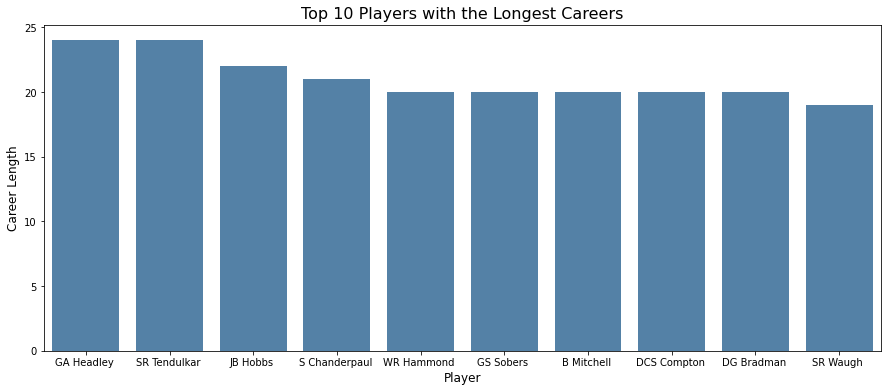

In [34]:
"""
players with top 10 career legnths
"""

top_10 = df.sort_values(by = 'Career_Length', ascending=False)[['Player', 'Career_Length']].head(10)

# OR
# top_10= df.nlargest(10, 'Career_Length')

plt.figure(figsize=(15,6))
sns.barplot(data = top_10, 
            x = 'Player',
            y = 'Career_Length', 
            color = 'steelblue', 
            order = top_10['Player']
           )
# Add title and labels
plt.title('Top 10 Players with the Longest Careers', size = 16)
plt.xlabel('Player', size = 12)
plt.ylabel('Career Length', size = 12)

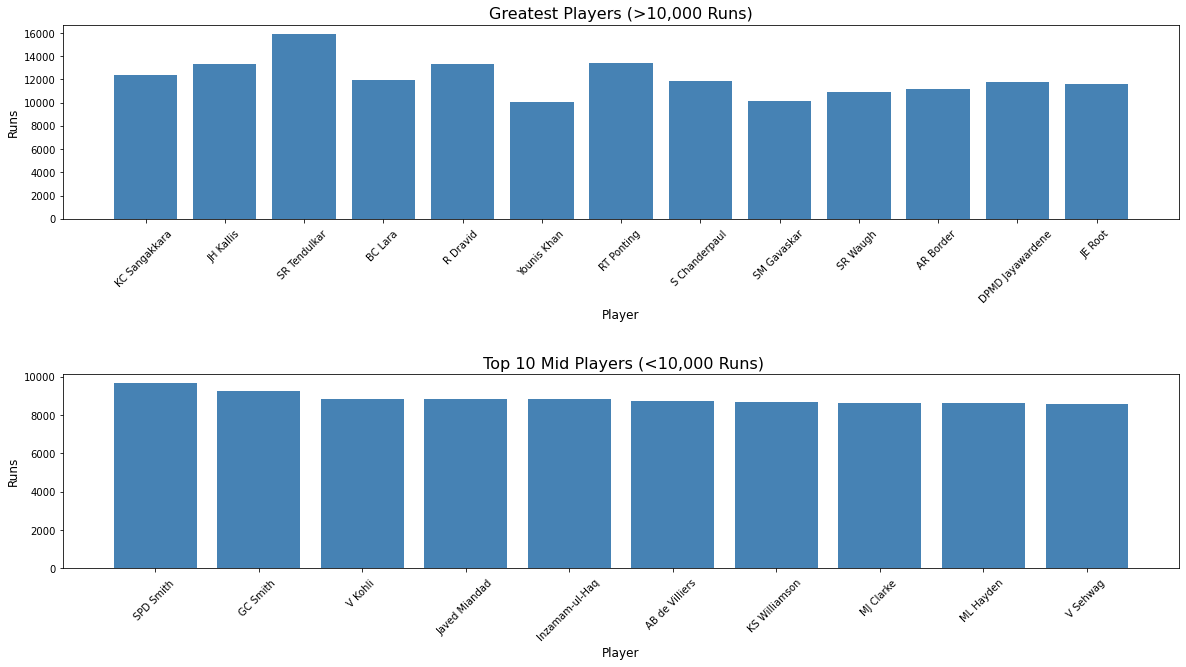

In [35]:
"""
Number of cricketer with score > 10,000 as greatest players

"""

greatest_players = df[df['Runs'] > 10000][['Player', 'Runs']]
mid_players = df[df['Runs'] <= 10000 ][['Player', 'Runs']].sort_values('Runs', ascending = False).head(10)


fig, ax = plt.subplots(2,1, figsize = (20,10))

# greatest players
ax[0].bar(greatest_players['Player'], greatest_players['Runs'], color='steelblue')
ax[0].set_title('Greatest Players (>10,000 Runs)', size = 16)
ax[0].set_xlabel('Player', size = 12)
ax[0].set_ylabel('Runs', size = 12)
ax[0].tick_params(axis='x', rotation=45)  

ax[1].bar(mid_players['Player'], mid_players['Runs'], color='steelblue')
ax[1].set_title(' Top 10 Mid Players (<10,000 Runs)', size = 16)
ax[1].set_xlabel('Player', size = 12)
ax[1].set_ylabel('Runs', size = 12)
ax[1].tick_params(axis='x', rotation=45)  

plt.subplots_adjust(hspace=0.8) 

In [36]:
"""
Max Highest innings score by country

"""
max_score_country = df.groupby('Country')['Highest_Inn_Score'].max().reset_index()

# Merge with df on country and highest_inn_score:
merged = pd.merge(max_score_country, df, how='left', on=['Country', 'Highest_Inn_Score'])

# Highest Scores:
max_scores = merged[['Player', 'Country', 'Highest_Inn_Score']]

max_scores

,Player,Country,Highest_Inn_Score
0,ML Hayden,AUS,380.0
1,L Hutton,ENG,364.0
2,V Sehwag,IND,319.0
3,KS Williamson,NZ,251.0
4,Inzamam-ul-Haq,PAK,329.0
5,AB de Villiers,SA,278.0
6,DPMD Jayawardene,SL,374.0
7,BC Lara,WI,400.0
8,A Flower,ZIM,232.0


In [59]:
'''
Top 5 Cricketing nations Hundreds, fifties, ducks (0), average runs   
'''

# perform groupby
top_5 = df.groupby('Country').agg({
    '100s': 'count',
    '50s': 'count',
    'Ducks': 'count',
    'Runs': 'mean'
})

top_5_nations = top_5.reset_index()

# Sort values in descending order
sorted_top_5 = top_5_nations.sort_values('Runs', ascending=False).head(5)

sorted_top_5['Runs'] = sorted_top_5['Runs'].round(0)

# After sorting you need to reset_index as well
sorted_top_5 = sorted_top_5.reset_index(drop = True)

sorted_top_5

,Country,100s,50s,Ducks,Runs
0,SL,3,3,3,9892.0
1,IND,6,6,6,9642.0
2,PAK,5,5,5,7294.0
3,AUS,16,16,16,6627.0
4,WI,9,9,9,6222.0
